In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns # VISUALIZAÇÃO DE DADOS (TRABALHA COM A MATPLOTLIB)
import matplotlib.pyplot as plt # criar visualizações estáticas, animadas e interativas

# Carregar o conjunto de dados
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tcc/Netflix Dataset Latest 2021.csv")

# Selecionar as colunas relevantes
relevant_columns = ["Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice", "Hidden Gem Score"]
df = df[relevant_columns]

# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Converter a coluna "Boxoffice" para numérico
df["Boxoffice"] = df["Boxoffice"].str.replace("$", "").str.replace(",", "").astype(float)

# plt.figure(figsize=(12,5))
# sns.heatmap(df.corr(), annot=True, cmap="Wistia")
# plt.show()

# Separar as variáveis de entrada (X) e o alvo (y)
X = df[["Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice"]]
y = df["Hidden Gem Score"]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Visualizar os valores testados
# print("Valores testados:")
# print(X_test)
# print(y_test)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 0.9755764063300741
#############


<ipython-input-29-0a137abe5bea>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Boxoffice"] = df["Boxoffice"].str.replace("$", "").str.replace(",", "").astype(float)


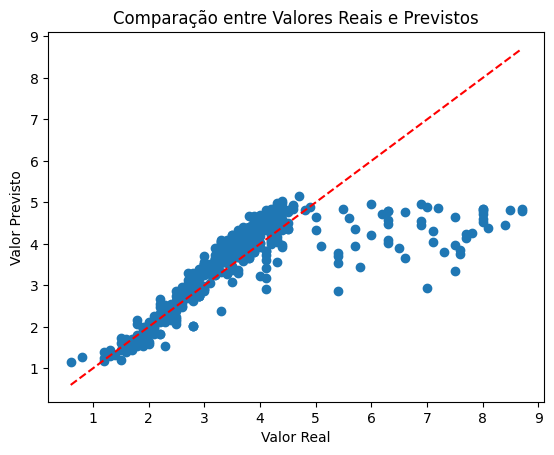

In [ ]:
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criar gráfico de dispersão
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

Isso criará um gráfico de dispersão com os valores reais no eixo x e os valores previstos pelo modelo no eixo y. A linha vermelha pontilhada representa a linha ideal, onde os valores reais e previstos são iguais. A dispersão dos pontos em torno dessa linha indica o quão bem o modelo está fazendo as previsões.


In [ ]:
# Valores de entrada para a previsão
new_data = {
    "Rotten Tomatoes Score": 80,
    "Metacritic Score": 75,
    "Awards Received": 3,
    "Awards Nominated For": 5,
    "Boxoffice": 1000000,
}

# Converter os valores de entrada para um DataFrame
new_data_df = pd.DataFrame(new_data, index=[0])

# Fazer a previsão do Hidden Gem Score
prediction = model.predict(new_data_df)

new_data_df['prediction Hidden Gem Score'] = prediction

display(new_data_df)

print("Previsão do Hidden Gem Score:", prediction[0])


,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,prediction Hidden Gem Score
0,80,75,3,5,1000000,4.288755


Previsão do Hidden Gem Score: 4.288755478919933
